In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
#read from csv file 
df = pd.read_csv('data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:

X = df.drop(columns=['diagnosis','Unnamed: 32'],axis=1)
y = df.diagnosis

In [4]:
len(df)

569

In [5]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
col =list(df.columns)

In [7]:
col.remove('Unnamed: 32')
col.remove('diagnosis')
col

['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

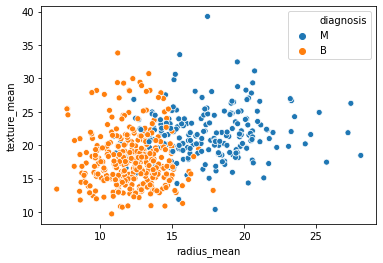

In [8]:
sns.scatterplot(x='radius_mean',y='texture_mean',data=df,hue='diagnosis')

In [16]:
# EditedNearestNeighbours
from imblearn.under_sampling import EditedNearestNeighbours

ENN = EditedNearestNeighbours(random_state=33,n_neighbors=4)
new_X, new_y = ENN.fit_resample(X, y)



In [17]:
pd.Series(new_y).value_counts()

B    215
M    212
dtype: int64

In [19]:
new_df = pd.DataFrame(new_X,columns=col)
new_df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,857155.0,12.05,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.02749,0.1675,...,13.76,20.70,89.88,582.6,0.1494,0.21560,0.30500,0.06548,0.2747,0.08301
1,857156.0,13.49,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,0.1809,...,15.15,31.82,99.00,698.8,0.1162,0.17110,0.22820,0.12820,0.2871,0.06917
2,857343.0,11.76,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,...,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563
3,857373.0,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,...,14.67,23.19,96.08,656.7,0.1089,0.15820,0.10500,0.08586,0.2346,0.08025
4,857374.0,11.94,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.01349,0.1868,...,13.10,21.33,83.67,527.2,0.1144,0.08906,0.09203,0.06296,0.2785,0.07408


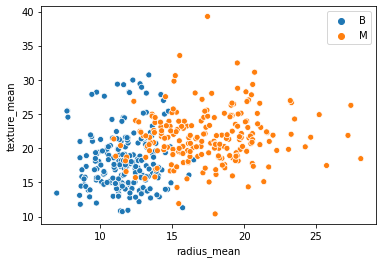

In [20]:
sns.scatterplot(x='radius_mean',y='texture_mean',data=new_df,hue=new_y)